# EvalUMAP Task 2 - Getting Started Documentation
This notebook is a guide for:
- Initialising the gym-push environment for Task 2
- Requesting Task 2 sample data
- Interacting with the environment in train and test mode
- Running simple example generative model
- Submitting Task 2 results

In [1]:
import gym
import random
import pandas as pd
from datetime import datetime
%matplotlib inline
from IPython.display import clear_output

## Create an instance of the environment
Call this once to instantiate Task 2 of the gym-push environment

The environment contains the following useful methods/attributes:
- observation_space.info
- action_space.info
- request_sample_data()
- reset()
- step()

In [2]:
env = gym.make('gym_push:evalumap2-v0')

EvalUMAP2-v0 environment


#### Action space

In [3]:
display(env.action_space.info)
print('Category labels:', env.action_space.info['category']['labels'].classes_)

{'appPackage': {'type': 'object', 'labels': LabelEncoder()},
 'category': {'type': 'object', 'labels': LabelEncoder()},
 'ledARGB': {'type': 'object', 'labels': LabelEncoder()},
 'priority': {'type': 'object', 'labels': LabelEncoder()},
 'vibrate': {'type': 'object', 'labels': LabelEncoder()},
 'visibility': {'type': 'object', 'labels': LabelEncoder()},
 'subject': {'type': 'object', 'labels': LabelEncoder()},
 'enticement': {'type': 'object', 'labels': LabelEncoder()},
 'sentiment': {'type': 'object', 'labels': LabelEncoder()}}

Category labels: ['alarm' 'email' 'event' 'msg' 'service' 'transport' 'unknown']


#### Observation space

In [4]:
display(env.observation_space.info)
print('App-last-used labels:', env.observation_space.info['timeAppLastUsed']['labels'].classes_)

{'timeAppLastUsed': {'type': 'object', 'labels': LabelEncoder()},
 'timeOfDay': {'type': 'object', 'labels': LabelEncoder()},
 'dayOfWeek': {'type': 'object', 'labels': LabelEncoder()},
 'unlockCount_prev2': {'type': 'int64',
  'max': 36,
  'min': -1,
  'mean': 7.556426500590573,
  'median': 6.0},
 'uniqueAppsLaunched_prev2': {'type': 'int64',
  'max': 30,
  'min': 0,
  'mean': 13.718350692580264,
  'median': 13.0},
 'dayOfMonth': {'type': 'int64',
  'max': 31,
  'min': 1,
  'mean': 15.81187587243638,
  'median': 16.0}}

App-last-used labels: ['few mins' 'immediate' 'over a week ago' 'within 24 hours'
 'within few hours' 'within half hour' 'within hour' 'within last week']


## Request sample data from the environment
This method returns a sample of data which is indicative of data which is:
1. received from the environment
2. required by the environment

#### 1. received from the environment
Two subsets of data are provided by the environment. The first is context. A DataFrame containing context features is provided when reset() is called and when step() is called. The second subset of data provided by the environment is engagement. A DataFrame containing an action taken by a user on a previous notification in a previous context is provided when step() is called.

#### 2. required by the environment
One subset of data is required by the environment in order to iterate through each context. This is a notification. A DataFrame containing a generated notification must be passed as an argument to the step() method in order to proceed. The notification is paired with the current context and the environment calculates how the user will act toward the notification (open/dismiss). 

In [5]:
sample_contexts, sample_notifications, sample_engagements = env.request_sample_data()
display(sample_contexts)
display(sample_notifications)
display(sample_engagements)

,timeAppLastUsed,timeOfDay,dayOfWeek,unlockCount_prev2,uniqueAppsLaunched_prev2,dayOfMonth
2289,within 24 hours,early-morning,Sun,5,11,13
3571,within 24 hours,morning,Sun,0,5,13
8457,immediate,morning,Sun,0,13,13
8507,immediate,morning,Sun,6,15,13
1970,immediate,morning,Sun,12,18,13


,appPackage,category,ledARGB,priority,vibrate,visibility,subject,enticement,sentiment
2289,ie.rte.news,alarm,transparent,high,unknown,private,unknown,moderate,low
3571,com.google.android.googlequicksearchbox,unknown,transparent,min,unknown,private,unknown,low,low
8457,io.wia.wia,unknown,transparent,default,unknown,private,unknown,moderate,low
8507,ie.rte.news,unknown,transparent,default,unknown,private,unknown,low,low
1970,com.google.android.googlequicksearchbox,unknown,transparent,min,unknown,private,unknown,moderate,low


,action
0,0
1,0
2,1
3,1
4,0


## Training
As with the Task 1 environment, there are two modes for the environment - train and test. Both modes operate identically, but use differing data sets and simulated users. The *train* environment should be used to develop your model. 

Below is an example of initialising the environment in train mode and looping through the contexts. For brevity, a random notification is passed to the environment at each step. This notification should be generated by your adaptive model, given the context and engagement information available at each step. Once the environment has stepped through all context observations it will return a positive *finished* flag and calculate the final performance metrics of the generated notifications.

Note: the environment generates interim metrics at an epoch interval of 1000 (notifications). This can be changed to suit your needs, but be wary that lowering this value will result in slowing down the completion time.

Resetting environment.
Updated results at epoch:  3000
Results saved here:  c:\users\kieran\git\evalumap\2020\custom_gym\gym-push\gym_push\envs/results/train/task2/
------------- Epoch: 3000 ------------------
Latest CTR score 22.159280239920026
Latest Diversity score 100.0
Latest Enticement score 48.61712762412529
Updated results at epoch:  6000
Results saved here:  c:\users\kieran\git\evalumap\2020\custom_gym\gym-push\gym_push\envs/results/train/task2/
------------- Epoch: 6000 ------------------
Latest CTR score 22.412931178136976
Latest Diversity score 100.0
Latest Enticement score 49.70838193634394
Updated results at epoch:  9000
Results saved here:  c:\users\kieran\git\evalumap\2020\custom_gym\gym-push\gym_push\envs/results/train/task2/
------------- Epoch: 9000 ------------------
Latest CTR score 21.875347183646262
Latest Diversity score 100.0
Latest Enticement score 50.12220864348406
Finished. Saving final results at epoch:  9313


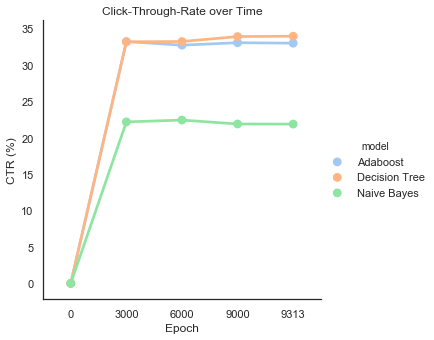

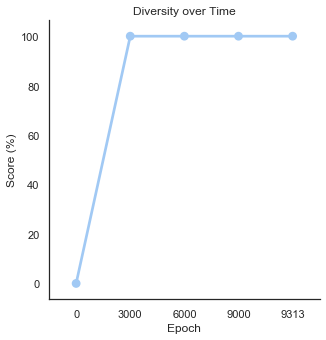

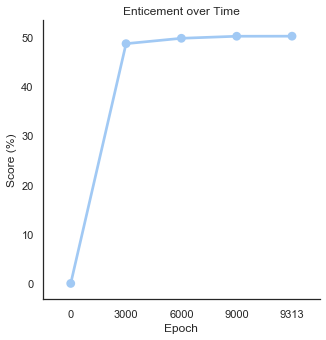

<Figure size 432x432 with 0 Axes>

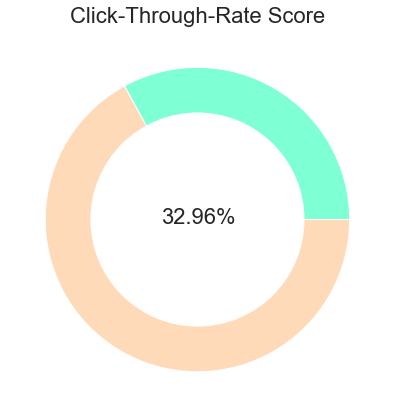

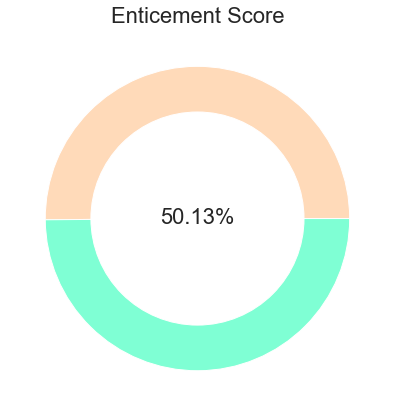

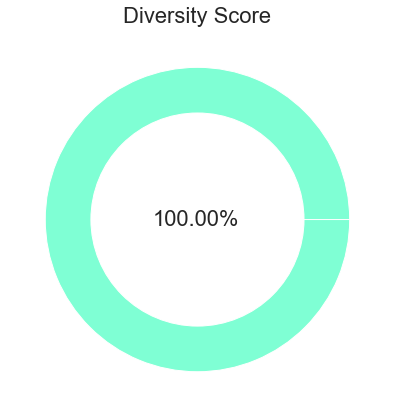

Results saved here:  c:\users\kieran\git\evalumap\2020\custom_gym\gym-push\gym_push\envs/results/train/task2/
Time elapsed (h:mm:ss):  0:02:07.391607


In [9]:
start = datetime.now()

context = env.reset(test=False, verbosity=3000)
finished = False
epoch = 0

while not finished:
    context, engagement, finished, info = env.step(pd.DataFrame([env.action_space.sample()]))
    
    if epoch%3000==0 and epoch>0:
        print('------------- Epoch: '+str(epoch)+' ------------------')
        print('Latest CTR score', info['ctr'][-1]['ctr_score'])
        print('Latest Diversity score', info['diversity'][-1]['score'])
        print('Latest Enticement score', info['enticement'][-1]['score'])
        
    epoch += 1
    
end = datetime.now()
time_taken = end - start
print('Time elapsed (h:mm:ss): ', time_taken) 

## Testing
The *test* environment gives you an opportunity to evaluate your model on **data from a different user**.

Below is an example of initialising the environment in test mode and looping through the contexts. For brevity, a random notification is passed to the environment at each step. This notification should be generated by your adaptive model, given the context and engagement information available at each step. Once the environment has stepped through all context observations it will return a positive *finished* flag and calculate the final performance metrics of the generated notifications.

Resetting environment.
Updated results at epoch:  3000
Results saved here:  c:\users\kieran\git\evalumap\2020\custom_gym\gym-push\gym_push\envs/results/test/task2/
------------- Epoch: 3000 ------------------
Latest CTR score 20.293235588137286
Latest Diversity score 100.0
Latest Enticement score 50.31656114628456
Updated results at epoch:  6000
Results saved here:  c:\users\kieran\git\evalumap\2020\custom_gym\gym-push\gym_push\envs/results/test/task2/
------------- Epoch: 6000 ------------------
Latest CTR score 20.379936677220464
Latest Diversity score 100.0
Latest Enticement score 50.28328611898017
Finished. Saving final results at epoch:  8500


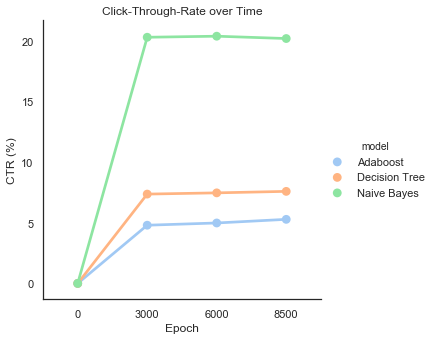

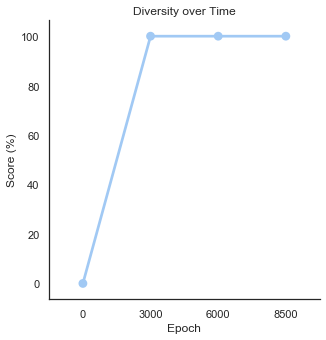

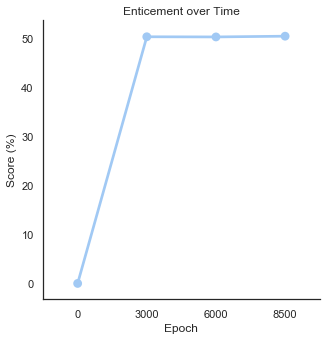

<Figure size 432x432 with 0 Axes>

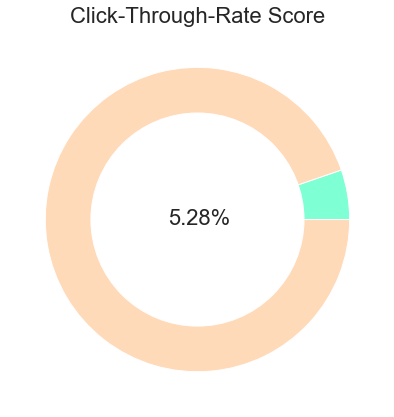

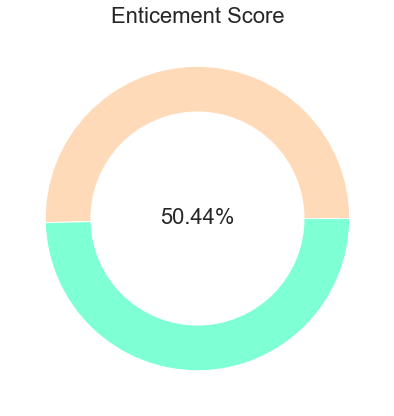

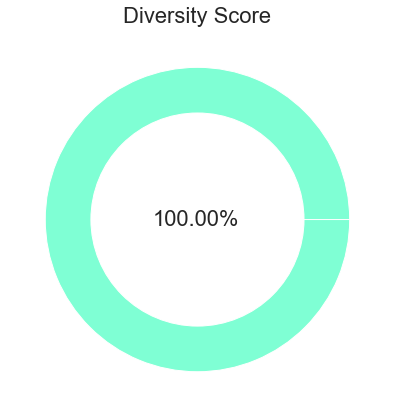

Results saved here:  c:\users\kieran\git\evalumap\2020\custom_gym\gym-push\gym_push\envs/results/test/task2/
Time elapsed (h:mm:ss):  0:02:01.164342


In [7]:
start = datetime.now()

context = env.reset(test=True, verbosity=3000)
finished = False
epoch = 0

while not finished:
    context, engagement, finished, info = env.step(pd.DataFrame([env.action_space.sample()]))
    
    if epoch%3000==0 and epoch>0:
        print('------------- Epoch: '+str(epoch)+' ------------------')
        print('Latest CTR score', info['ctr'][-len(env.models):][0]['ctr_score'])
        print('Latest Diversity score', info['diversity'][-1]['score'])
        print('Latest Enticement score', info['enticement'][-1]['score'])
        
    epoch += 1
    
end = datetime.now()
time_taken = end - start
print('Time elapsed (h:mm:ss): ', time_taken) 

## Example methods
A quick example of leveraging engagement data as it is made available by the environment. The following code illustrates how CTR can be improved by identifying a notification that is opened by the user.

A random notification is sampled from the action space until one is found that results in a positive engagement. That notification is always sent to the user until negative feedback is received. When negative feedback is received, another random notification is sampled using the action space.

Repeating notifications, naturally, results in a poor diversity score.

Resetting environment.
Updated results at epoch:  3000
Results saved here:  c:\users\kieran\git\evalumap\2020\custom_gym\gym-push\gym_push\envs/results/train/task2/
------------- Epoch: 3000 ------------------
Latest CTR score 97.63412195934688
Latest Diversity score 88.42105263157895
Latest Enticement score 13.795401532822392
Updated results at epoch:  6000
Results saved here:  c:\users\kieran\git\evalumap\2020\custom_gym\gym-push\gym_push\envs/results/train/task2/
------------- Epoch: 6000 ------------------
Latest CTR score 98.816863856024
Latest Diversity score 88.42105263157895
Latest Enticement score 31.89468421929678
Updated results at epoch:  9000
Results saved here:  c:\users\kieran\git\evalumap\2020\custom_gym\gym-push\gym_push\envs/results/train/task2/
------------- Epoch: 9000 ------------------
Latest CTR score 99.21119875569381
Latest Diversity score 88.42105263157895
Latest Enticement score 37.92911898677925
Finished. Saving final results at epoch:  9313


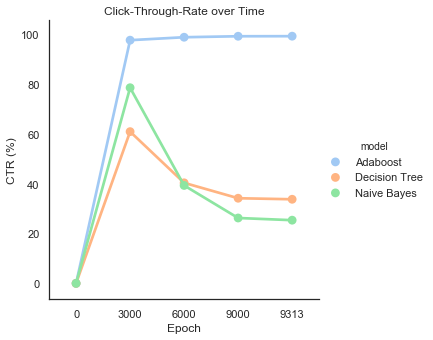

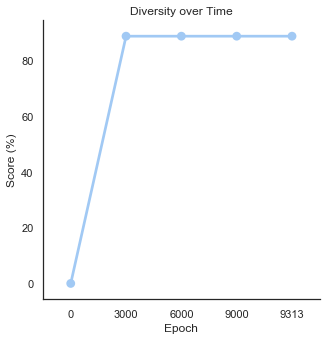

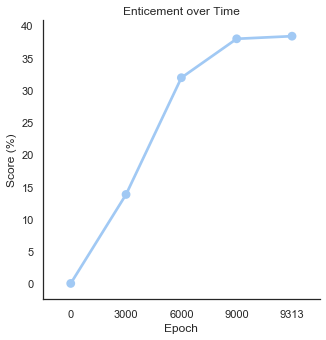

<Figure size 432x432 with 0 Axes>

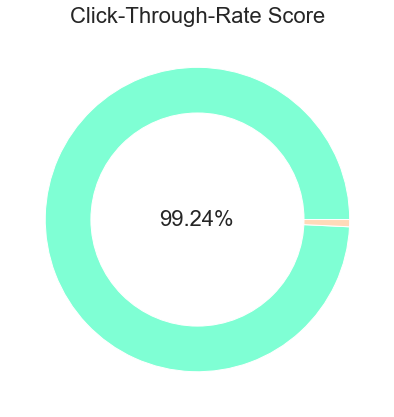

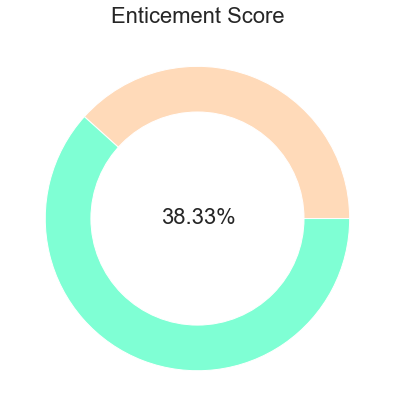

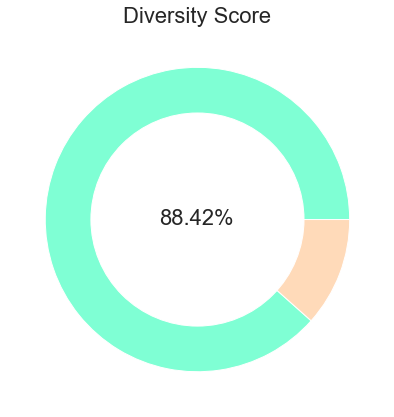

Results saved here:  c:\users\kieran\git\evalumap\2020\custom_gym\gym-push\gym_push\envs/results/train/task2/
Time elapsed (h:mm:ss):  0:02:04.256774


In [8]:
start = datetime.now()

context = env.reset(test=False, verbosity=3000)
engagement = pd.DataFrame([{'action':0}])
notification = pd.DataFrame([env.action_space.sample()])

finished = False
epoch = 0

while not finished:
    
    if engagement.action[0] == 1:
        context, engagement, finished, info = env.step(notification)
    else:
        notification = pd.DataFrame([env.action_space.sample()])
        context, engagement, finished, info = env.step(notification)
    
    if epoch%3000==0 and epoch>0:
        print('------------- Epoch: '+str(epoch)+' ------------------')
        print('Latest CTR score', info['ctr'][-len(env.models):][0]['ctr_score'])
        print('Latest Diversity score', info['diversity'][-1]['score'])
        print('Latest Enticement score', info['enticement'][-1]['score'])
        
    epoch += 1
    
end = datetime.now()
time_taken = end - start
print('Time elapsed (h:mm:ss): ', time_taken) 